100%|██████████| 32/32 [00:21<00:00,  1.50it/s]


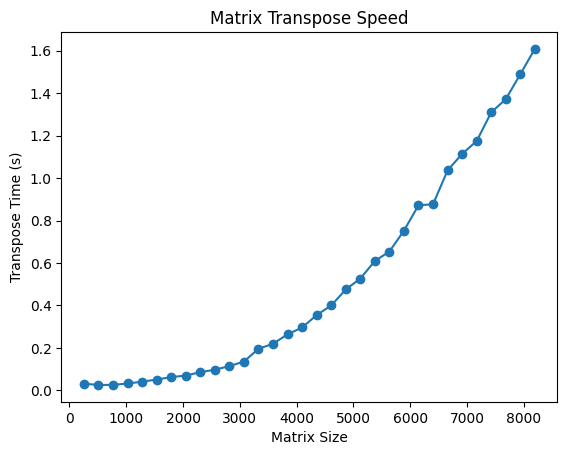

In [9]:
import torch
import time
import matplotlib.pyplot as plt
from tqdm import tqdm

def test_transpose(matrix_size):
    # 创建随机矩阵
    matrix = torch.randn(matrix_size, matrix_size).cuda()
    
    # 计时开始
    start_time = time.time()
    
    for _ in range(1000):
        transposed_matrix = matrix.t().contiguous()
        torch.cuda.synchronize()
    
    # 计时结束
    end_time = time.time()
    
    # 返回转置时间（秒）
    return end_time - start_time

# 不同规模矩阵的尺寸
matrix_sizes = list(range(256, 8193, 256))

# 存储转置时间的列表
transpose_times = []

# 测试不同规模矩阵的转置速度
for size in tqdm(matrix_sizes):
    time_taken = test_transpose(size)
    transpose_times.append(time_taken)

# 绘制折线图
plt.plot(matrix_sizes, transpose_times, marker='o')
plt.xlabel('Matrix Size')
plt.ylabel('Transpose Time (s)')
plt.title('Matrix Transpose Speed')
plt.show()